In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from VirtualWorld.World import World

In [3]:
world = World()

Big Bang!


Simulating 6 years
Want to adopt, but no such feature in game yet
Want to adopt, but no such feature in game yet
Want to adopt, but no such feature in game yet
Want to adopt, but no such feature in game yet
------- Discussion #8 Details --------
5 debate participants: #Alicia Rhodes, Roland Clarke, Gladys Stuart, Cathy Mabery, Olivia Levy
Discussion on Topic: Immigration
Debating merits of article, "Trump's Justice Department tells court DACA is illegal, but oppose striking it down immediately" (Source: Washington Times | Bias: LEAN RIGHT).
The 5 participants were given the article to read, and 3 rounds to discuss the same.

----- FAMILIARITY WITH THE ISSUE -------

Alicia Rhodes
Current view influenced by reading 2 articles on Topic: Immigration.
Current position:-	 attitude: SLIGHTLY LEAN LEFT(-0.25) | opinion: SLIGHTLY LEAN LEFT(-0.25) | uncertainty: 0.0

Roland Clarke
Current view influenced by reading 6 articles on Topic: Immigration.
Current position:-	 attitude: RIGHT(1) | opini

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (10).

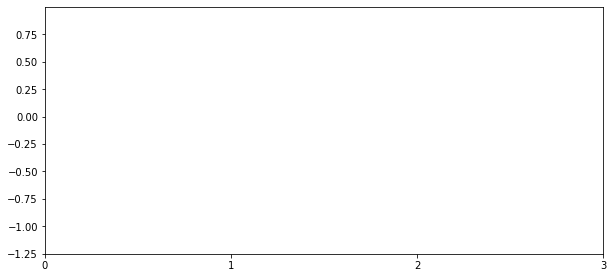

In [4]:
world.simulate_time(6)

In [11]:
import numpy as np
np.arange(0, 1.10, 0.10), ('0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 ('0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'))

In [ ]:
# Discussion 1 
opinions = [0.33, 0.55, -0.64, -0.18]
participants = ["Ada Lawson", "Johnnie Helm", "Ashley Thurston","Helga Bass"]

# Discussion 2
# participants = ["Shirley Johnson", "Mary Lindhorst", "James Pease"]
# opinions = [1, -1, 0.34]

# Discussion 3 
# opinions = [0.85, 0.73, -0.11, 0.70, -0.08, -0.01, 0.58, -0.95, 0.93]
# participants = ["Angelo", "Josephine", "Juan", "Karen", "Kathleen", "Kevin", "Lashawna", "Patrice", "Sarah"]

# Discussion 4
# participants = ["Norma Garner", "Kenneth Lyman", "William Mahaffey-Cochran", "Amy Welsh", "Edward Moore"]
# opinions = [0.78, -1, 0.04, -0.21, 1]

op_np = np.zeros((len(opinions), 2))
for index, op in enumerate(opinions): 
    op_np[index, 0] = op

In [ ]:
import numpy as np
from statistics import mean
from collections import defaultdict
import jenkspy
import numpy as np

def find_best_grouping_of_opinions():
    def small_grouping_opinions():
        opinions.sort()
        maximumGap = 0
        split = 0

        for i in range(len(opinions) - 1):
            if(maximumGap < (opinions[i + 1] - opinions[i])):
                maximumGap = opinions[i + 1] - opinions[i]
                split = opinions[i]
        groups = [[num for num in opinions if num <= split], [num for num in opinions if num > split]]
        opinion_grouping = defaultdict(list)
        participant_grouping = defaultdict(list)
        for group in groups:
            if len(group) > 0: 
                mean_group = round(mean(group), 2) 
                opinion_grouping[mean_group] = group
                for index, op in enumerate(opinions): 
                    if op in group: 
                        person = participants[index]
                        participant_grouping[mean_group].append(participants[index])
                        
        return opinion_grouping, participant_grouping

    def get_classified_ops(zone_indices, show_participants=False):
        if not show_participants: 
            array_sort = [np.array([opinions[index] for index in zone]) for zone in zone_indices if zone]
            return array_sort

        else:
            array_sort = [[opinions[index] for index in zone] for zone in zone_indices if zone]
            participants_sort = [[participants[index] for index in zone] for zone in zone_indices if zone]

            opinion_grouping = defaultdict(list)
            participant_grouping = defaultdict(list)
            
            for index, zone in enumerate([zone for zone in array_sort]): 
                mean_op = round(mean(zone), 2)
                opinion_grouping[mean_op] = [op for op in zone]
                participant_grouping[mean_op] = participants_sort[index]

            return [opinion_grouping, participant_grouping]


    def goodness_of_variance_fit(nclasses):

        # Breaks will include the min/max of the data 
        # 3 is the min num_classes that is taken into the breaks --> i.e. produces 2 classes 
        classes = jenkspy.jenks_breaks(opinions, nb_class=nclasses)
        classified = np.array([classify(i, classes) for i in opinions])
        maxz = max(classified)
        zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

        array_sort = get_classified_ops(zone_indices)
        sdam = np.sum((opinions - np.mean(opinions)) ** 2)
        sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
        gvf = (sdam - sdcm) / sdam

        return gvf, zone_indices

    def classify(value, breaks):
        for i in range(1, len(breaks)):
            if value <= breaks[i]:
                return i
        return len(breaks) - 1


    gvf = 0.0
    nclasses = 2

    if len(opinions) <= 3:
        return small_grouping_opinions()
        
    # Goodness of fit set to 0.9
    best_gvf = 0.0
    best_zone_indices = None
    while nclasses < len(opinions) and gvf < 0.9:
        gvf, zone_indices = goodness_of_variance_fit(nclasses)
        if gvf > best_gvf: 
            best_gvf = gvf
            best_zone_indices = zone_indices
            print(best_gvf, get_classified_ops(best_zone_indices, show_participants=True)[1].values())

        nclasses += 1
        
    return get_classified_ops(best_zone_indices, show_participants=True)

In [ ]:
find_best_grouping_of_opinions()